In this checkpoint I will develop a customer segnmentation to define a marketing strategy


Columns explanation : 

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account 
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user 
PAYMENTS: Amount of Payment done by user 

This notbook was inpired by Daniel Simamora 'Credit Card Customer Segmentation' in kaggle

the code was write by me and correct by Deepseek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering, KMeans



Import Data

In [15]:
DataCredit = pd.read_csv('/Users/booba/Downloads/Credit_card_dataset.csv')

In [16]:
print(DataCredit.head(4))

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  


In [17]:
print(DataCredit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None


In [18]:
print(DataCredit.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [19]:
DataCredit = DataCredit.dropna().reset_index(drop=True)

In [20]:
print(DataCredit.describe())

       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8949.000000   8949.000000   8949.000000   8949.000000   
mean            0.877350   1003.316936   1733.336511   4494.449450   
std             0.236798   2136.727848   2895.168146   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.800000    383.282850   1600.000000   
50%             1.000000    361.490000    857.062706   3000.000000   
75%             1.000000   1110.170000   1901.279320   6500.000000   
max             1.000000  49039.570000  50721.483360  30000.000000   

       CASH_ADVANCE  
count   8949.000000  
mean     978.959616  
std     2097.264344  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%     1113.868654  
max    47137.211760  


In [21]:
print(DataCredit.duplicated().sum())

0


In [23]:
DataCredit = DataCredit.drop('CUST_ID', axis=1)

In [24]:
# ce code a été generer par Deepseek
from scipy.stats import zscore
import numpy as  np

z_scores = np.abs(DataCredit.apply(zscore))
outliers = (z_scores > 3)  # Seuil : 3 écarts-types

print(outliers.sum())  # Nombre d'outliers par colonne

BALANCE_FREQUENCY    182
PURCHASES            135
PAYMENTS             159
CREDIT_LIMIT         152
CASH_ADVANCE         182
dtype: int64


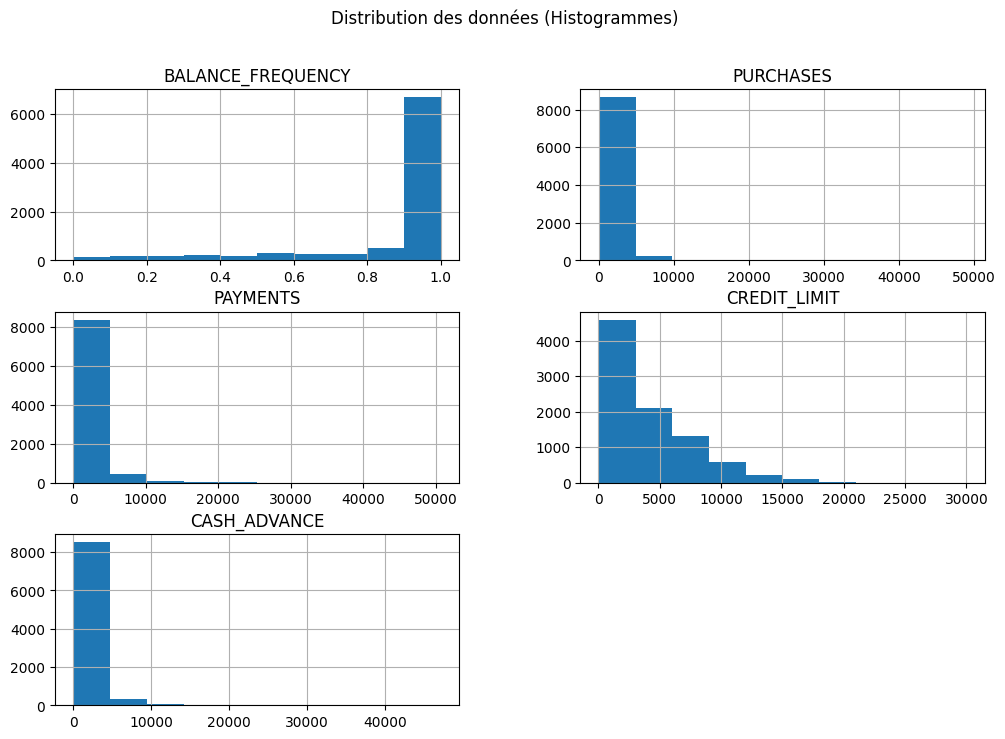

In [ ]:
# ce code a été generer par Deepseek 

DataCredit.hist(bins=10, figsize=(12, 8))
plt.suptitle("Distribution des données (Histogrammes)")
plt.show()

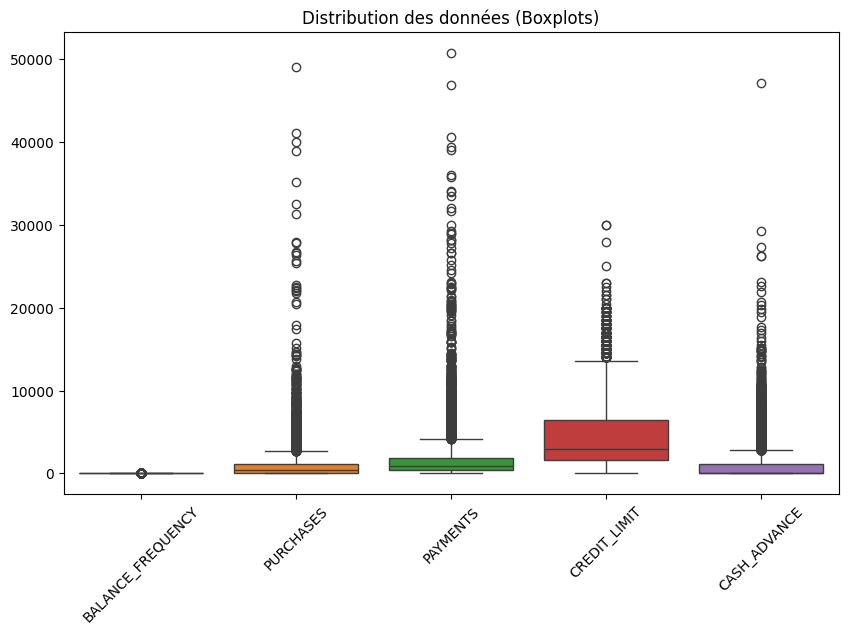

In [ ]:
# ce code a été generer par Deepseek 

plt.figure(figsize=(10, 6))
sns.boxplot(data=DataCredit)
plt.title("Distribution des données (Boxplots)")
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

Vu que la destribution n'est pas harmonieuse et que notre data ne contient que 8949 lignes et 5 columns  on va essayer plusieurs traitement de technique inspirer par le notbook sité au part avant outliers et je ne préfére pas les eleminer MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler 

Pourquoi combiner une transformation logarithmique avec un scaler ?
Réduire l'impact des outliers :

La transformation logarithmique compresse les grandes valeurs, réduisant ainsi l'effet des outliers.

Cela permet aux scalers de fonctionner plus efficacement, car ils ne seront pas dominés par des valeurs extrêmes.

Normaliser les données :

Après la transformation logarithmique, les données peuvent encore avoir des échelles différentes ou une distribution asymétrique.

Appliquer un scaler permet de standardiser ou normaliser les données pour qu'elles soient adaptées aux algorithmes de machine learning.

Améliorer les performances des modèles :

De nombreux algorithmes (comme la régression linéaire, les SVM, ou les réseaux de neurones) fonctionnent mieux lorsque les données sont normalisées et sans outliers.
Données avec des zéros :

Si les données contiennent des zéros, utilisez np.log1p (logarithme de x+1x+1) pour éviter des erreurs.

Ces explication sont fournis par Deepseek et inspirer par le notbook sité précedament 

In [27]:
# ce code est 50% de moi et inspirer du notbook a 50 %

logscaled_DCredit = np.log1p(DataCredit)
print(logscaled_DCredit.head())


   BALANCE_FREQUENCY  PURCHASES  PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
0           0.597837   4.568506  5.312231      6.908755      0.000000
1           0.646627   0.000000  8.319725      8.853808      8.770896
2           0.693147   6.651791  6.434654      8.922792      0.000000
3           0.492477   7.313220  0.000000      8.922792      5.331694
4           0.693147   2.833213  6.521114      7.090910      0.000000


MinMaxScaler (Deepseek source)
Le MinMax Scaling est un scaler qui est fortement influencé par les valeurs maximales et minimales dans nos données. Donc, si nos données contiennent des outliers (valeurs aberrantes), cela peut introduire un biais. Le MinMaxScaler redimensionne le jeu de données de telle manière que toutes les valeurs des caractéristiques (features) se trouvent dans l'intervalle [0, 1]. Cela est fait de manière indépendante pour chaque caractéristique.

Explication détaillée
Influence des valeurs extrêmes :

Le MinMaxScaler utilise les valeurs minimales et maximales de chaque colonne pour effectuer la mise à l'échelle.

Si les données contiennent des outliers (valeurs extrêmement grandes ou petites), ces valeurs vont influencer fortement le résultat, ce qui peut biaiser la mise à l'échelle.

Plage de sortie :

Après application du MinMaxScaler, toutes les valeurs sont ramenées dans l'intervalle [0, 1].

Cela signifie que la valeur minimale devient 0 et la valeur maximale devient 1, tandis que les autres valeurs sont interpolées entre ces deux bornes.

Traitement indépendant des caractéristiques :

Chaque colonne (ou caractéristique) est traitée de manière indépendante. Cela signifie que le scaling est appliqué séparément à chaque variable, sans tenir compte des autres.

In [28]:
MinMaxScalerDC = MinMaxScaler().fit_transform(logscaled_DCredit)

StandardScaler(Deepseek souce)
Le StandardScaler est un scaler qui centre et réduit l'ensemble des données autour de l'origine (point central), ce qui a pour effet de donner une moyenne de 0 et un écart-type de 1.

Explication détaillée
Centrage des données :

Le StandardScaler soustrait la moyenne (
μ
μ) de chaque colonne pour centrer les données autour de 0.

Cela signifie que la moyenne de chaque caractéristique devient 0.

Réduction des données :

Ensuite, il divise chaque valeur par l'écart-type (
σ
σ) de la colonne pour normaliser l'échelle des données.

Cela garantit que l'écart-type de chaque caractéristique devient 1.


Cela permet de standardiser les données pour qu'elles soient comparables entre elles.

In [29]:
StandardScalerDC = StandardScaler().fit_transform(logscaled_DCredit)

RobustScaler(Deepseek)
Le RobustScaler fonctionne de manière similaire au MinMaxScaler, mais au lieu d'utiliser les valeurs minimales et maximales, il utilise le 1er quartile (Q1) et le 3e quartile (Q3). De cette manière, les données ne sont pas affectées par la présence d'outliers (valeurs extrêmes ou nombres très élevés).

Explication détaillée
Utilisation des quartiles :

Le RobustScaler utilise l'intervalle interquartile (IQR), qui est la différence entre le 3e quartile (Q3) et le 1er quartile (Q1).

Robustesse aux outliers :

Contrairement au MinMaxScaler, qui utilise les valeurs minimales et maximales, le RobustScaler utilise des statistiques robustes (médiane et IQR) qui ne sont pas influencées par les valeurs extrêmes.

Cela rend le RobustScaler beaucoup plus résistant aux outliers.

Résultat :

Les données sont centrées autour de la médiane et mises à l'échelle en fonction de l'IQR.

Les valeurs transformées ne sont pas contraintes dans une plage fixe (comme [0, 1]), mais elles sont moins sensibles aux outliers.

In [30]:
RobustScalerDC = RobustScaler().fit_transform(logscaled_DCredit)

MaxAbsScaler(Deepseek source )
Le MaxAbsScaler met à l'échelle les données en utilisant la valeur absolue maximale. Ainsi, la présence de nombres négatifs très grands (massifs) sera ramenée à -1, et la présence de nombres positifs très grands sera ramenée à 1.

Explication détaillée
Principe :

Le MaxAbsScaler divise chaque valeur par la valeur absolue maximale de la colonne.

Plage de sortie :

Les valeurs transformées se situent dans l'intervalle [-1, 1].

Les valeurs positives sont ramenées entre 0 et 1.

Les valeurs négatives sont ramenées entre -1 et 0.

Préservation des zéros :

Les valeurs nulles (0) restent inchangées, car elles ne sont pas affectées par la division.

In [31]:
MaxAbsScalerDC = MaxAbsScaler().fit_transform(logscaled_DCredit)

Visualisation ce code a été génerer par Deepseek

In [ ]:

MinMaxScalerDC_df = pd.DataFrame(MinMaxScalerDC, columns=DataCredit.columns)


Visualisation générée avec succès : visualisation_interactive.html


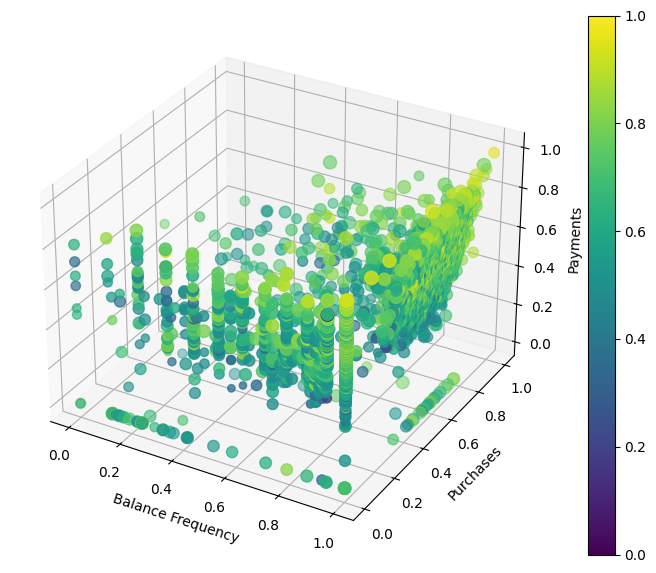

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    MinMaxScalerDC_df['BALANCE_FREQUENCY'],
    MinMaxScalerDC_df['PURCHASES'],
    MinMaxScalerDC_df['PAYMENTS'],
    c=MinMaxScalerDC_df['CREDIT_LIMIT'],
    s=MinMaxScalerDC_df['CASH_ADVANCE']*100
)

plt.colorbar(scatter)
ax.set_xlabel('Balance Frequency')
ax.set_ylabel('Purchases')
ax.set_zlabel('Payments')
plt.show()

In [39]:
StandardScalerDC_df = pd.DataFrame(StandardScalerDC, columns=DataCredit.columns)

/Users/booba/Desktop/script.py/.venv/lib/python3.12/site-packages/matplotlib/collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



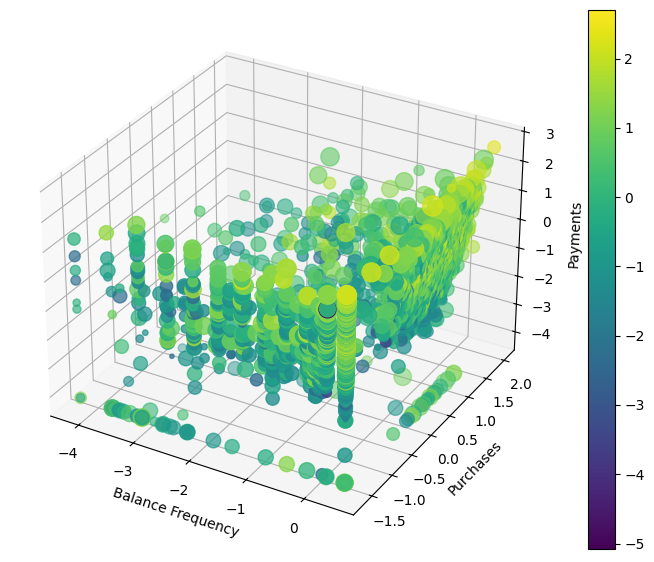

In [40]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    StandardScalerDC_df['BALANCE_FREQUENCY'],
    StandardScalerDC_df['PURCHASES'],
    StandardScalerDC_df['PAYMENTS'],
    c=StandardScalerDC_df['CREDIT_LIMIT'],
    s=StandardScalerDC_df['CASH_ADVANCE']*100
)

plt.colorbar(scatter)
ax.set_xlabel('Balance Frequency')
ax.set_ylabel('Purchases')
ax.set_zlabel('Payments')
plt.show()

In [42]:
RobustScalerDC_df = pd.DataFrame(RobustScalerDC, columns=DataCredit.columns)

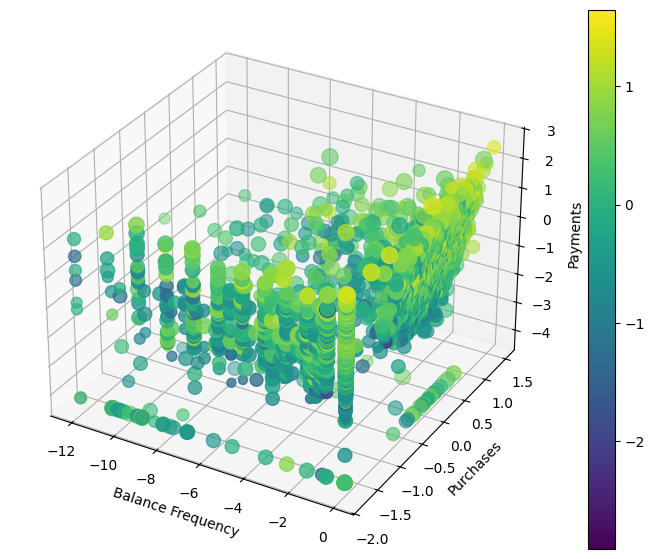

In [43]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    RobustScalerDC_df['BALANCE_FREQUENCY'],
    RobustScalerDC_df['PURCHASES'],
    RobustScalerDC_df['PAYMENTS'],
    c=RobustScalerDC_df['CREDIT_LIMIT'],
    s=RobustScalerDC_df['CASH_ADVANCE']*100
)

plt.colorbar(scatter)
ax.set_xlabel('Balance Frequency')
ax.set_ylabel('Purchases')
ax.set_zlabel('Payments')
plt.show()

In [44]:
MaxAbsScalerDC_df = pd.DataFrame(MaxAbsScalerDC, columns=DataCredit.columns)

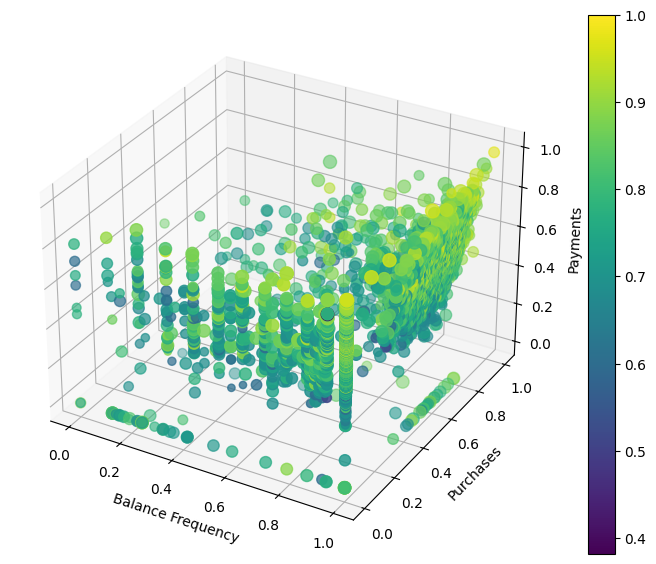

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    MaxAbsScalerDC_df['BALANCE_FREQUENCY'],
    MaxAbsScalerDC_df['PURCHASES'],
    MaxAbsScalerDC_df['PAYMENTS'],
    c=MaxAbsScalerDC_df['CREDIT_LIMIT'],
    s=MaxAbsScalerDC_df['CASH_ADVANCE']*100
)

plt.colorbar(scatter)
ax.set_xlabel('Balance Frequency')
ax.set_ylabel('Purchases')
ax.set_zlabel('Payments')
plt.show()

Le minmax cemble celui qui nous a donnez le meilleur resultat sur les cluster on va applique sur lui l'aglomerative et le Kmeans 

In [46]:
# ce code a été copier du notbook et adabper a ma data 

from sklearn.metrics import silhouette_score

inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(MinMaxScalerDC)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(MinMaxScalerDC, kmeans.labels_))
    

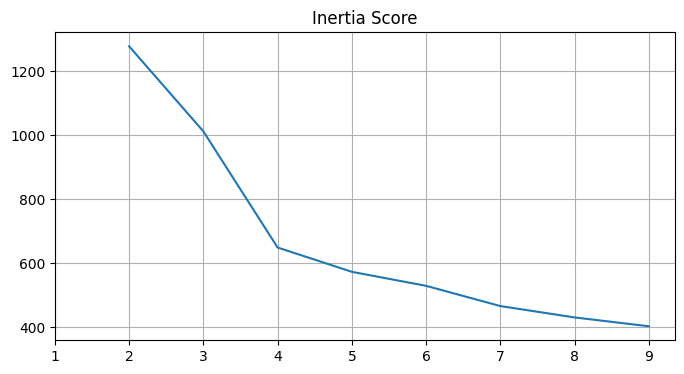

In [47]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Inertia Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

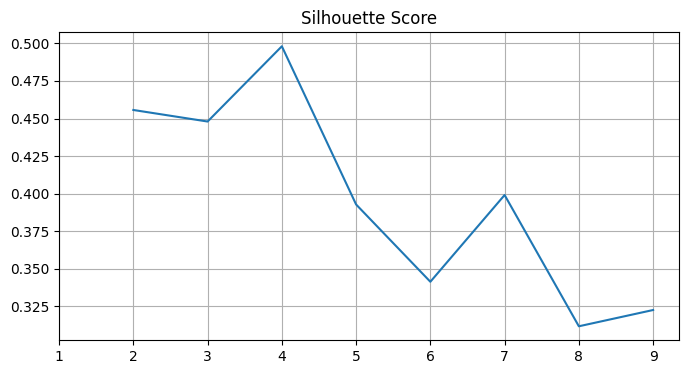

In [48]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [49]:
# Choosing cluster = 4

kmeans = KMeans(n_clusters=4)
kmeans.fit(MinMaxScalerDC)
kmeans_labels = kmeans.labels_

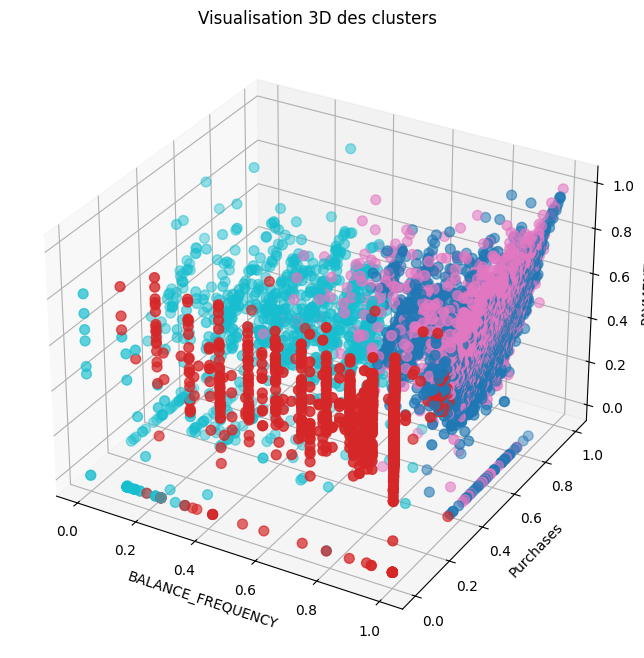

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(MinMaxScalerDC[:,0], 
           MinMaxScalerDC[:,1], 
           MinMaxScalerDC[:,2], 
           c=kmeans_labels,
           cmap='tab10',
           s=50)

ax.set_xlabel('BALANCE_FREQUENCY')
ax.set_ylabel('Purchases')
ax.set_zlabel('PAYMENTS')
plt.title('Visualisation 3D des clusters')
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Configuration du modèle avec 4 clusters (ajustable)
model = AgglomerativeClustering(
    n_clusters=4,          # Nombre de clusters
    metric='euclidean',  # Métrique de distance
    linkage='ward'         # Critère de fusion
)

# Application du modèle
clusters = model.fit_predict(MinMaxScalerDC_df)

# Ajout des labels de cluster au DataFrame
MinMaxScalerDC_df['Cluster'] = clusters

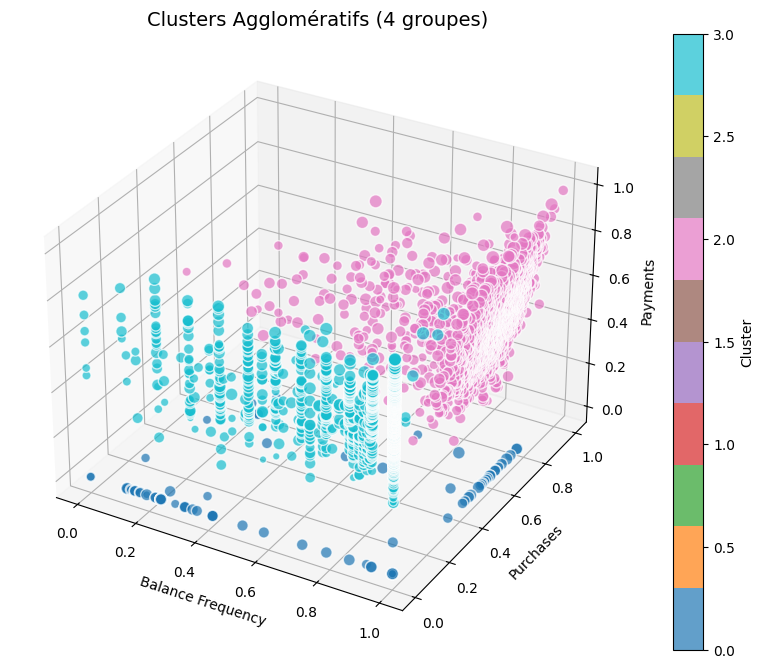

In [ ]:
# ce code a été generer a 100% par Deepseek

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot avec couleurs par cluster
scatter = ax.scatter(
    MinMaxScalerDC_df['BALANCE_FREQUENCY'],
    MinMaxScalerDC_df['PURCHASES'],
    MinMaxScalerDC_df['PAYMENTS'],
    c=MinMaxScalerDC_df['Cluster'],  # Couleur basée sur le cluster
    s=MinMaxScalerDC_df['CASH_ADVANCE']*100,  # Taille basée sur CASH_ADVANCE
    cmap='tab10',  # Palette de couleurs pour 4 clusters
    alpha=0.7,
    edgecolors='w'
)

# Personnalisation
ax.set_xlabel('Balance Frequency', fontsize=10)
ax.set_ylabel('Purchases', fontsize=10)
ax.set_zlabel('Payments', fontsize=10)
plt.title('Clusters Agglomératifs (4 groupes)', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.show()

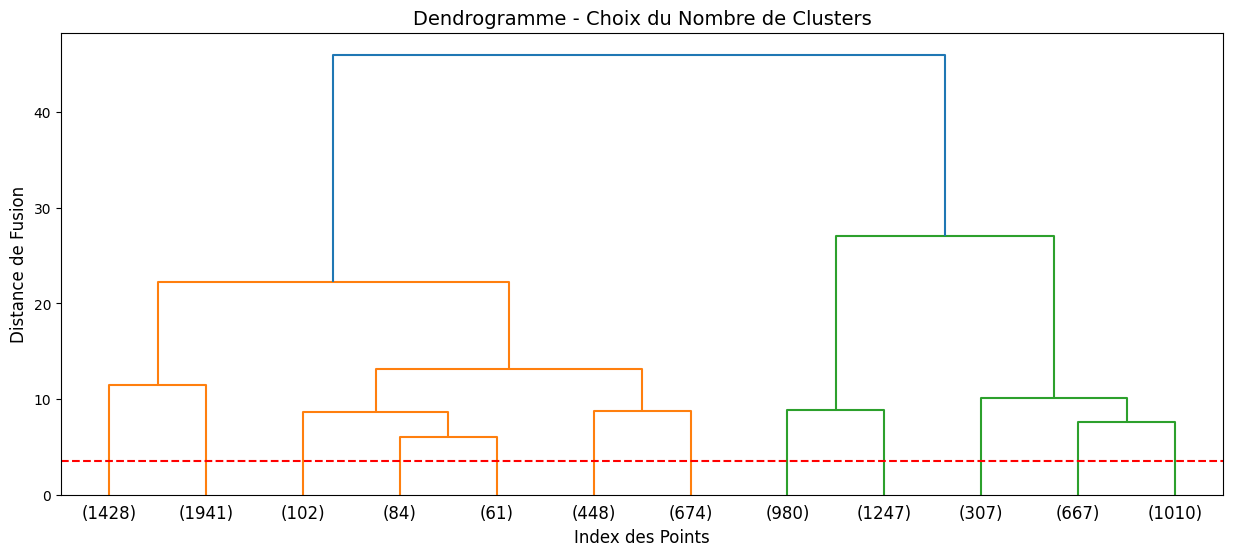

In [56]:
# Calcul de la matrice de liaison
Z = linkage(MinMaxScalerDC_df.drop('Cluster', axis=1), method='ward')

# Visualisation du dendrogramme
plt.figure(figsize=(15, 6))
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.axhline(y=3.5, color='r', linestyle='--')  # Ajustez cette ligne pour choisir k
plt.xlabel('Index des Points', fontsize=12)
plt.ylabel('Distance de Fusion', fontsize=12)
plt.title('Dendrogramme - Choix du Nombre de Clusters', fontsize=14)
plt.show()

In [57]:
# Statistiques descriptives par cluster
print(MinMaxScalerDC_df.groupby('Cluster').mean())

         BALANCE_FREQUENCY  PURCHASES  PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
Cluster                                                                    
0                 0.528965   0.489838  0.463773      0.635243      0.050790
1                 0.984602   0.617268  0.627184      0.654210      0.000000
2                 0.963900   0.587334  0.666395      0.675329      0.640239
3                 0.915641   0.001032  0.625164      0.637231      0.637459


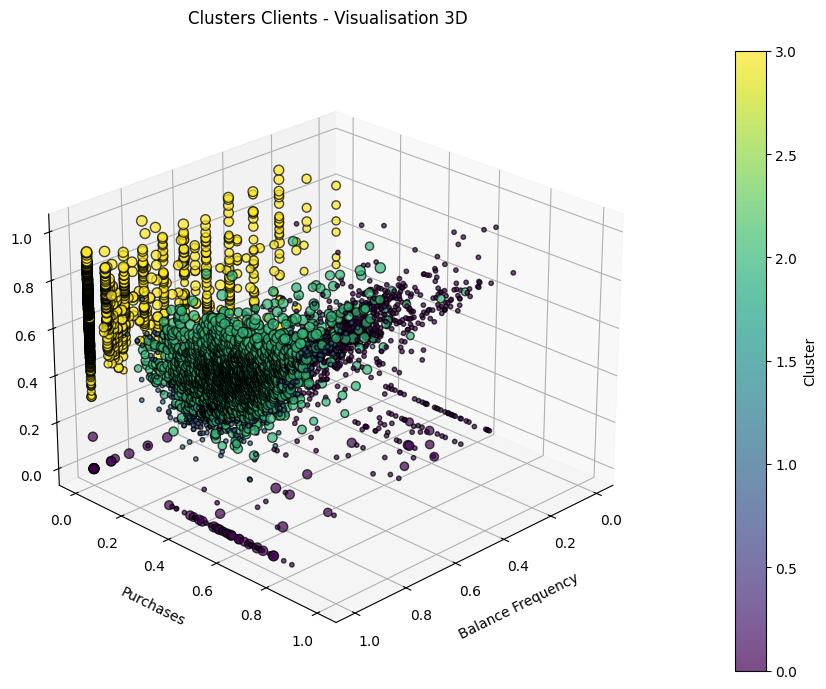

In [ ]:
# ce code a été generer par Deepseek


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Version minimaliste adaptée à VS Code
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Visualisation des clusters avec matplotlib natif
sc = ax.scatter(
    MinMaxScalerDC_df['BALANCE_FREQUENCY'],
    MinMaxScalerDC_df['PURCHASES'],
    MinMaxScalerDC_df['PAYMENTS'],
    c=MinMaxScalerDC_df['Cluster'],  # Utilisez vos labels de cluster existants
    s=MinMaxScalerDC_df['CASH_ADVANCE']*50 + 10,  # Taille minimale de 10
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

# Configuration des labels
ax.set_xlabel('Balance Frequency', labelpad=10)
ax.set_ylabel('Purchases', labelpad=10)
ax.set_zlabel('Payments', labelpad=10)

# Ajout d'une colorbar et titre
plt.colorbar(sc, pad=0.1).set_label('Cluster')
plt.title("Clusters Clients - Visualisation 3D", pad=20)

# Ajustement de la perspective
ax.view_init(elev=25, azim=45)  # Angle de vue modifiable

plt.tight_layout()
plt.show()

Pour déterminer les meilleurs paramètres pour le Agglomerative Clustering et confirmer que k=4 est optimal, voici une approche complète basée sur des méthodes visuelles et des métriques quantitatives, sans utiliser de librairies supplémentaires :

Étape 1 : Validation de k=4 via le Dendrogramme

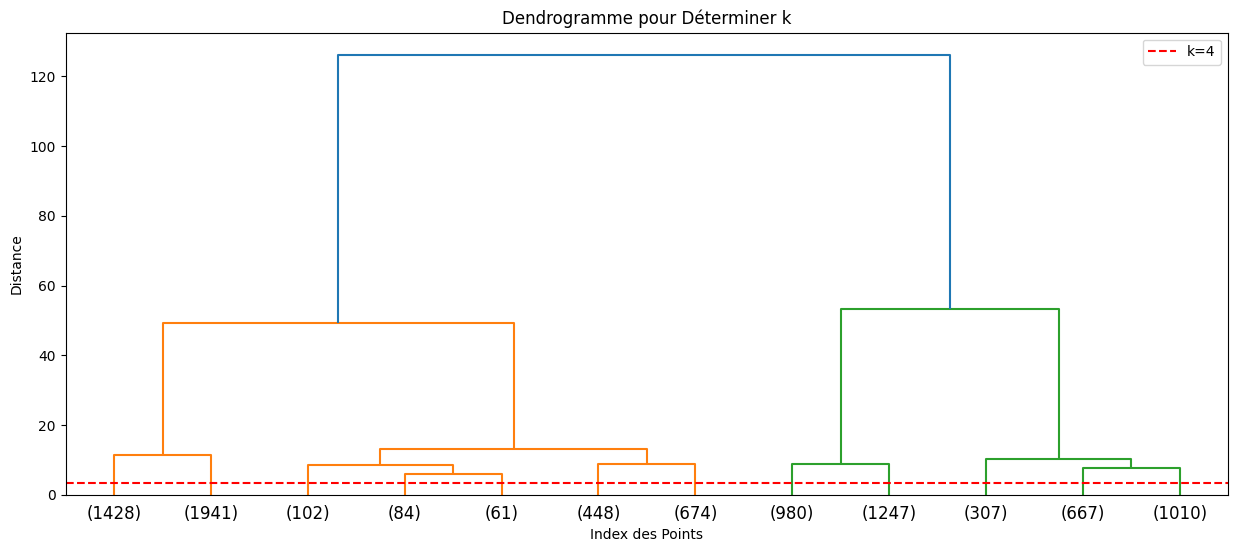

In [60]:


# Calculer la matrice de liaison
Z = linkage(MinMaxScalerDC_df, method='ward')  # Méthode à tester : 'ward', 'average', 'complete'

# Afficher le dendrogramme
plt.figure(figsize=(15, 6))
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.axhline(y=3.5, color='r', linestyle='--', label='k=4')  # Ajuster la hauteur selon vos données
plt.xlabel('Index des Points')
plt.ylabel('Distance')
plt.title('Dendrogramme pour Déterminer k')
plt.legend()
plt.show()

Étape 2 : Comparaison des Méthodes de Liaison
Testez les 4 critères de liaison principaux et comparez visuellement les clusters générés :

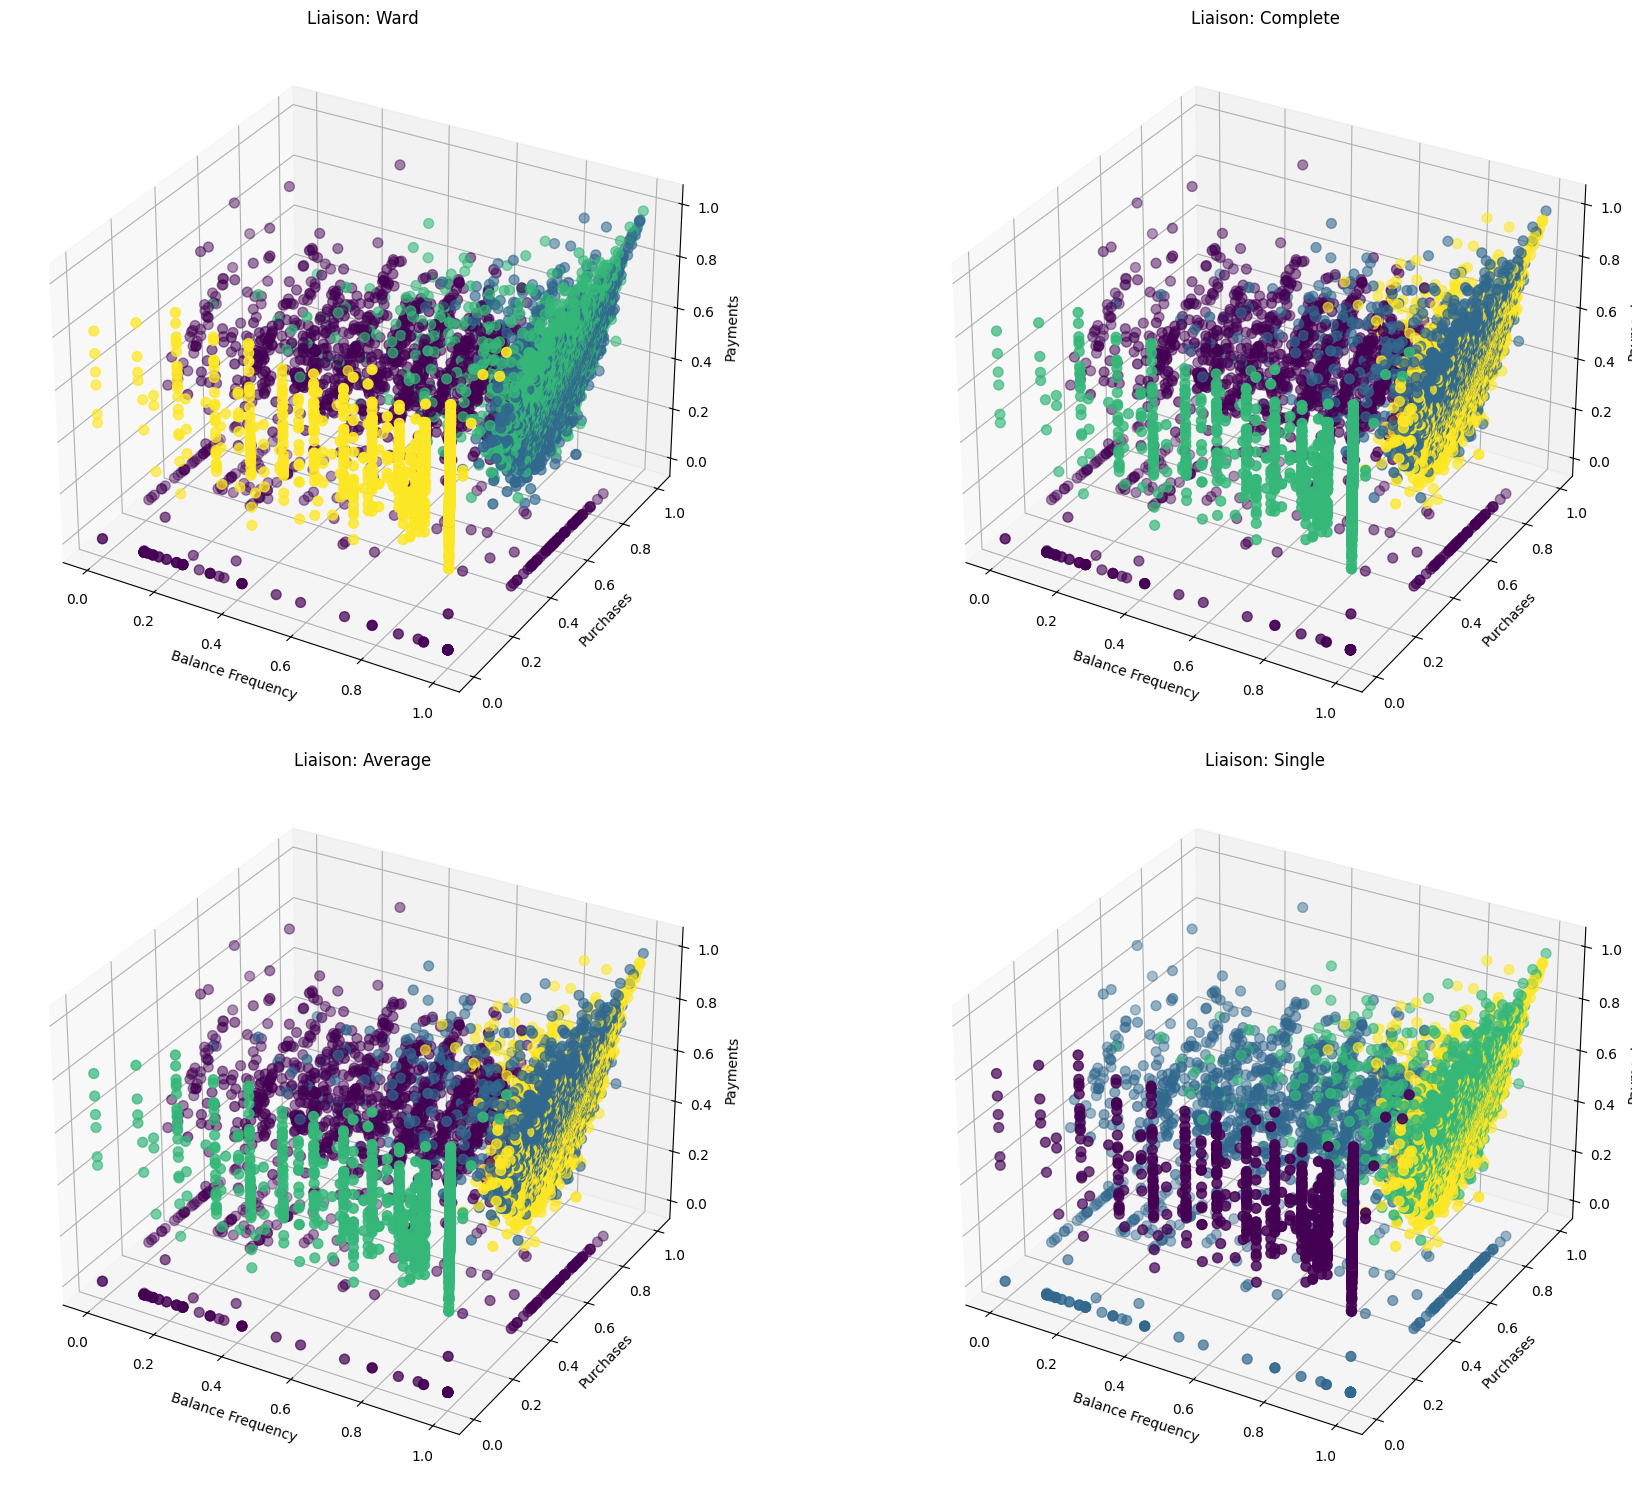

In [61]:
linkage_methods = ['ward', 'complete', 'average', 'single']

fig = plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods, 1):
    # Clustering
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = model.fit_predict(MinMaxScalerDC_df)
    
    # Visualisation
    ax = fig.add_subplot(2, 2, i, projection='3d')
    scatter = ax.scatter(
        MinMaxScalerDC_df['BALANCE_FREQUENCY'],
        MinMaxScalerDC_df['PURCHASES'],
        MinMaxScalerDC_df['PAYMENTS'],
        c=labels,
        cmap='viridis',
        s=50
    )
    ax.set_title(f'Liaison: {method.capitalize()}')
    ax.set_xlabel('Balance Frequency')
    ax.set_ylabel('Purchases')
    ax.set_zlabel('Payments')

plt.tight_layout()
plt.show()

Étape 3 : Métriques d'Évaluation (Optionnel)
Calculez des scores pour comparer objectivement les méthodes :

In [62]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=4, linkage=method)
    labels = model.fit_predict(MinMaxScalerDC_df)
    
    sil_score = silhouette_score(MinMaxScalerDC_df, labels)
    db_score = davies_bouldin_score(MinMaxScalerDC_df, labels)
    
    print(f"Méthode {method.upper()}:")
    print(f"  - Silhouette Score: {sil_score:.3f} (Plus proche de 1 = meilleur)")
    print(f"  - Davies-Bouldin Score: {db_score:.3f} (Plus proche de 0 = meilleur)\n")

Méthode WARD:
  - Silhouette Score: 0.717 (Plus proche de 1 = meilleur)
  - Davies-Bouldin Score: 0.463 (Plus proche de 0 = meilleur)

Méthode COMPLETE:
  - Silhouette Score: 0.717 (Plus proche de 1 = meilleur)
  - Davies-Bouldin Score: 0.463 (Plus proche de 0 = meilleur)

Méthode AVERAGE:
  - Silhouette Score: 0.717 (Plus proche de 1 = meilleur)
  - Davies-Bouldin Score: 0.463 (Plus proche de 0 = meilleur)

Méthode SINGLE:
  - Silhouette Score: 0.717 (Plus proche de 1 = meilleur)
  - Davies-Bouldin Score: 0.463 (Plus proche de 0 = meilleur)



Étape 4 : Analyse des Clusters (k=4)
Une fois la meilleure méthode sélectionnée (ex: ward), analysez les caractéristiques des clusters :

         BALANCE_FREQUENCY  PURCHASES  PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
Cluster                                                                    
0                 0.528965   0.489838  0.463773      0.635243      0.050790
1                 0.984602   0.617268  0.627184      0.654210      0.000000
2                 0.963900   0.587334  0.666395      0.675329      0.640239
3                 0.915641   0.001032  0.625164      0.637231      0.637459


/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_12564/3327230285.py:12: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



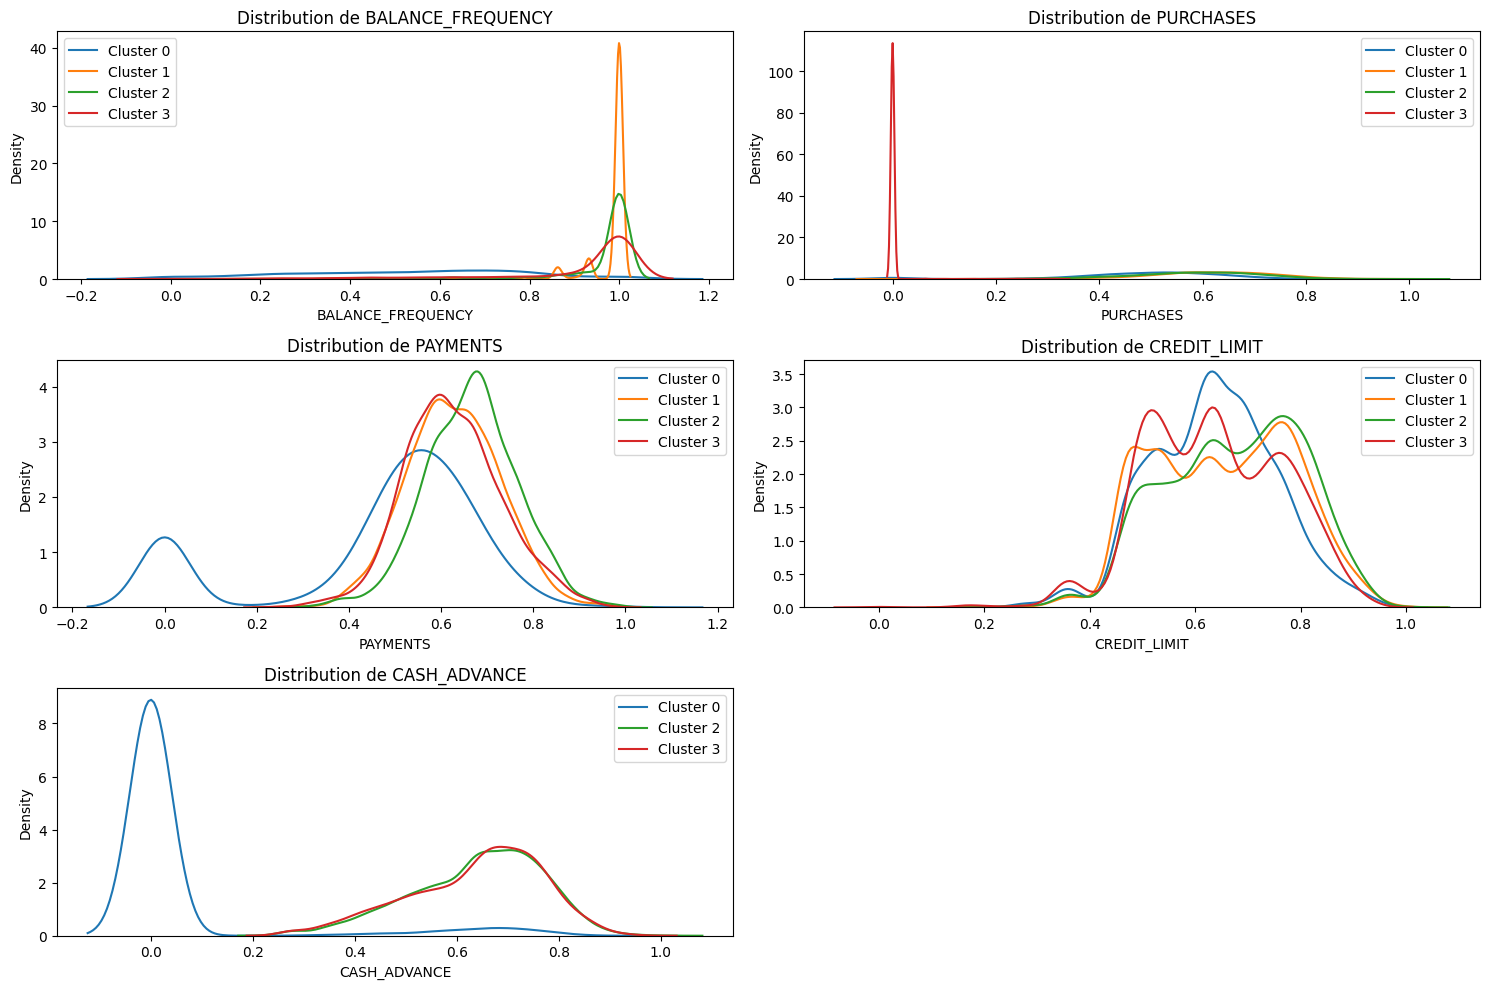

In [63]:
# Cluster stats
cluster_stats = MinMaxScalerDC_df.groupby('Cluster').mean()
print(cluster_stats)

# Visualisation des distributions
features = ['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    for cluster in range(4):
        sns.kdeplot(MinMaxScalerDC_df[MinMaxScalerDC_df['Cluster']==cluster][feature], label=f'Cluster {cluster}')
    plt.title(f'Distribution de {feature}')
    plt.legend()

plt.tight_layout()
plt.show()